In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#dataset = "pr_school"
#dataset = "h_school11"
#dataset = "h_school13"
#dataset = "InVS15"
dataset = "hypertext"

In [3]:
def load_R_list(filename):
    R0_list_ = []
    Rinf_list_ = []
    file=open(filename, 'r')
    content =file.read().splitlines()
    for line in content:
        R0, Rinf = line.split(' ',2)
        R0_list_.append(float(R0))
        Rinf_list_.append(float(Rinf))
    file.close()
    return R0_list_, Rinf_list_

In [4]:
beta_range = np.logspace(-2,-1,num=10)
mu_range = np.logspace(-2,-1,num=10)

## Original network

In [5]:
M_R0_D = [[0] * len(mu_range) for row in beta_range]
M_Rinf_start_D = [[0] * len(mu_range) for row in beta_range]

for i in range(len(beta_range)):
    for j in range(len(mu_range)):
        beta = beta_range[i]
        mu = mu_range[j]
        filename = "results/D_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
        R0_list, Rinf_list = load_R_list(filename)
        M_R0_D[i][j] = np.mean(R0_list)
        M_Rinf_start_D[i][j] = np.mean([x for x in Rinf_list if x!=1]) #Rinf only if larger than 1        

## E network

In [6]:
M_R0_E = [[0] * len(beta_range) for row in mu_range]
M_Rinf_start_E = [[0] * len(mu_range) for row in beta_range]

for i in range(len(beta_range)):
    for j in range(len(mu_range)):
        beta = beta_range[i]
        mu = mu_range[j]
        R0_list = []
        Rinf_list = []
        filename = "results/E_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
        R0_list, Rinf_list = load_R_list(filename)
        M_R0_E[i][j] = np.mean(R0_list)
        M_Rinf_start_E[i][j] = np.mean([x for x in Rinf_list if x!=1]) #Rinf only if larger than 1
    

## ES network

In [7]:
M_R0_ES = [[0] * len(beta_range) for row in mu_range]
M_Rinf_start_ES = [[0] * len(mu_range) for row in beta_range]

for i in range(len(beta_range)):
    for j in range(len(mu_range)):
        beta = beta_range[i]
        mu = mu_range[j]
        R0_list = []
        Rinf_list = []
        filename = "results/ES_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
        R0_list, Rinf_list = load_R_list(filename)
        M_R0_ES[i][j] = np.mean(R0_list)
        M_Rinf_start_ES[i][j] = np.mean([x for x in Rinf_list if x!=1]) #Rinf only if larger than 1


## EST network:

In [8]:
M_R0_EST = [[0] * len(beta_range) for row in mu_range]
M_Rinf_start_EST = [[0] * len(mu_range) for row in beta_range]

for i in range(len(beta_range)):
    for j in range(len(mu_range)):
        beta = beta_range[i]
        mu = mu_range[j]
        filename = "results/EST_pat0_random/R_%s_beta_%.3f_mu_%.3f.txt"%(dataset,beta,mu)
        R0_list, Rinf_list = load_R_list(filename)
        M_R0_EST[i][j] = np.mean(R0_list)
        M_Rinf_start_EST[i][j] = np.mean([x for x in Rinf_list if x!=1]) #Rinf only if larger than 1
  

colorscale lims

In [9]:
fixed_scale = True 

In [10]:
R0_min = min(np.array(M_R0_D).min(), np.array(M_R0_E).min(), np.array(M_R0_ES).min(), np.array(M_R0_EST).min())
R0_max = max(np.array(M_R0_D).max(), np.array(M_R0_E).max(), np.array(M_R0_ES).max(), np.array(M_R0_EST).max())

Rinf_start_min = min(np.array(M_Rinf_start_D).min(), np.array(M_Rinf_start_E).min(), np.array(M_Rinf_start_ES).min(), np.array(M_Rinf_start_EST).min())
Rinf_start_max = max(np.array(M_Rinf_start_D).max(), np.array(M_Rinf_start_E).max(), np.array(M_Rinf_start_ES).max(), np.array(M_Rinf_start_EST).max())

# Differences

In [11]:
def Canberra_dist(M1,M2):
    C = 0
    Md = 0
    for i in range(len(M1)):
        for j in range(len(M1[0])):
            den = np.abs(M1[i][j]) + np.abs(M2[i][j])
            if den != 0:
                C += np.abs(M1[i][j] - M2[i][j])/den
                Md += np.abs(M1[i][j] - M2[i][j])
                
    d = Md/np.sum(M2)
    return C,Md,d

E vs original

In [12]:
M_R0_DE = np.array(M_R0_E) - np.array(M_R0_D)
C_R0_DE,Md_R0_DE,d_R0_DE = Canberra_dist(M_R0_E,M_R0_D)

In [15]:
M_Rinf_start_DE = np.array(M_Rinf_start_E) - np.array(M_Rinf_start_D)
C_Rinf_start_DE,Md_Rinf_start_DE,d_Rinf_start_DE = Canberra_dist(M_Rinf_start_E,M_Rinf_start_D)

Clust vs original

In [16]:
M_R0_DES = np.array(M_R0_ES) - np.array(M_R0_D)
C_R0_DES,Md_R0_DES,d_R0_DES = Canberra_dist(M_R0_ES,M_R0_D)

In [17]:
M_Rinf_start_DES = np.array(M_Rinf_start_ES) - np.array(M_Rinf_start_D)
C_Rinf_start_DES,Md_Rinf_start_DES,d_Rinf_start_DES = Canberra_dist(M_Rinf_start_ES,M_Rinf_start_D)

Memory vs original

In [18]:
M_R0_DEST = np.array(M_R0_EST) - np.array(M_R0_D)
C_R0_DEST,Md_R0_DEST,d_R0_DEST = Canberra_dist(M_R0_EST,M_R0_D)

In [19]:
M_Rinf_start_DEST = np.array(M_Rinf_start_EST) - np.array(M_Rinf_start_D)
C_Rinf_start_DEST,Md_Rinf_start_DEST,d_Rinf_start_DEST = Canberra_dist(M_Rinf_start_EST,M_Rinf_start_D)

colorscale lims

In [20]:
R0diff_min = min(M_R0_DE.min(), M_R0_DES.min(), M_R0_DEST.min())
R0diff_max = max(M_R0_DE.max(), M_R0_DES.max(), M_R0_DEST.max())

Rinfstart_diff_min = min(M_Rinf_start_DE.min(), M_Rinf_start_DES.min(), M_Rinf_start_DEST.min())
Rinfstart_diff_max = max(M_Rinf_start_DE.max(), M_Rinf_start_DES.max(), M_Rinf_start_DEST.max())

# Plot

In [28]:
fontsize = 13

In [29]:
plt.rcParams.update({'font.size': 10})

In [30]:
ticks = [0.01 , '', '', 0.02, '', '', 0.05, '' , '', 0.1]

In [31]:
def plot_matrix_panel_v2(M,minValue,maxValue,axx,title):
    sns.heatmap(M,
                annot=False, 
                vmin=minValue, 
                vmax=maxValue,
                xticklabels=ticks,
                yticklabels=ticks,
                cmap="Spectral_r",
                cbar = False,
                ax = axx)
    
    axx.tick_params(axis='x', rotation=30,labelbottom = True, bottom=True, top = False, labeltop=False)
    axx.tick_params(axis='y', rotation=30)
    axx.xaxis.set_label_position('bottom')
    axx.set_xlabel(r'$\mu$')
    axx.set_ylabel(r'$\beta$')
    axx.set_title(title, fontsize=fontsize)

In [32]:
def plot_matrix_panel_v2_cb(M,minValue,maxValue,cbar_label,axx,title,cb_ticks):
    sns.heatmap(M,
                annot=False, 
                vmin=minValue, 
                vmax=maxValue,
                xticklabels=ticks,
                yticklabels=ticks,
                cmap="Spectral_r",
                cbar_kws={'label': cbar_label,'orientation': 'horizontal'},
                cbar_ax=ax_bar,
                ax = axx)
    
    axx.tick_params(axis='x', rotation=30,labelbottom = True, bottom=True, top = False, labeltop=False)
    axx.tick_params(axis='y', rotation=30)
    axx.xaxis.set_label_position('bottom')
    ax_bar.xaxis.label.set_size(fontsize + 2)
    ax_bar.xaxis.set_label_position('top')
    axx.set_xlabel(r'$\mu$')
    axx.set_ylabel(r'$\beta$')
    axx.set_title(title, fontsize=fontsize)

In [33]:
def plot_matrix_diff_panel_v2(M,minValue,maxValue,axx,title):
    sns.heatmap(M,
                annot=False, 
                vmin=minValue, 
                vmax=maxValue,
                xticklabels=ticks,
                yticklabels=ticks,
                cmap="Spectral_r",
                center = 0.0,
                cbar=False,
                ax = axx)
    axx.tick_params(axis='x', rotation=30,labelbottom = True, bottom=True, top = False, labeltop=False)
    axx.tick_params(axis='y', rotation=30)
    axx.xaxis.set_label_position('bottom')
    axx.set_xlabel(r'$\mu$')
    axx.set_ylabel(r'$\beta$')
    axx.set_title(title, fontsize=fontsize)

In [34]:
def plot_matrix_diff_panel_v2_cb(M,minValue,maxValue,cbar_label,axx,title):
    sns.heatmap(M,
                annot=False, 
                vmin=minValue, 
                vmax=maxValue,
                xticklabels=ticks,
                yticklabels=ticks,
                cmap="Spectral_r",
                center = 0.0,
                cbar_kws={'label': cbar_label,'orientation': 'horizontal'},
                cbar_ax=ax_bar,
                ax = axx)
    axx.tick_params(axis='x', rotation=30,labelbottom = True, bottom=True, top = False, labeltop=False)
    axx.tick_params(axis='y', rotation=30)
    axx.xaxis.set_label_position('bottom')
    ax_bar.xaxis.label.set_size(fontsize + 2)
    ax_bar.xaxis.set_label_position('top')
    axx.set_xlabel(r'$\mu$')
    axx.set_ylabel(r'$\beta$')
    axx.set_title(title, fontsize=fontsize)

In [36]:
if not os.path.exists('figs/'):
        os.makedirs('figs/')

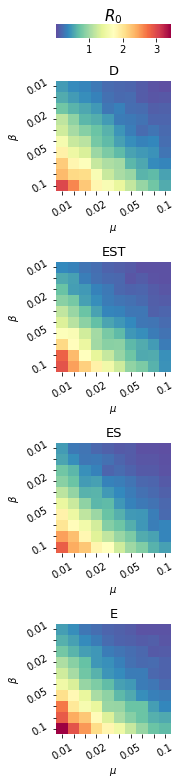

In [37]:
fig, (ax_bar,axN0,axD,axN1,axEST,axN2,axES,axN3,axE) = plt.subplots(nrows = 9, ncols = 1,figsize=(2.6,11),
                                                sharey=False,
                                                gridspec_kw={'height_ratios':[0.12,0.05,1,0.3,1,0.3,1,0.3,1]})


plot_matrix_panel_v2_cb(M_R0_D,R0_min,R0_max,'$R_0$',axD,'D',[1,2,3,4])
plot_matrix_panel_v2(M_R0_EST,R0_min,R0_max,axEST,'EST')
plot_matrix_panel_v2(M_R0_ES,R0_min,R0_max,axES,'ES')
plot_matrix_panel_v2(M_R0_E,R0_min,R0_max,axE,'E')
axN0.set_visible(False)
axN1.set_visible(False)
axN2.set_visible(False)
axN3.set_visible(False)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('figs/R0_heatmap_%s.pdf'%(dataset))
plt.show()

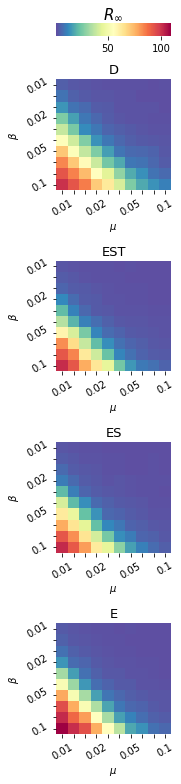

In [38]:
fig, (ax_bar,axN0,axD,axN1,axEST,axN2,axES,axN3,axE) = plt.subplots(nrows = 9, ncols = 1,figsize=(2.6,11),
                                                sharey=False,
                                                gridspec_kw={'height_ratios':[0.12,0.05,1,0.3,1,0.3,1,0.3,1]})

plot_matrix_panel_v2_cb(M_Rinf_start_D,Rinf_start_min,Rinf_start_max,'$R_{\infty}$',axD,'D',[100,200])
plot_matrix_panel_v2(M_Rinf_start_EST,Rinf_start_min,Rinf_start_max,axEST,'EST')
plot_matrix_panel_v2(M_Rinf_start_ES,Rinf_start_min,Rinf_start_max,axES,'ES')
plot_matrix_panel_v2(M_Rinf_start_E,Rinf_start_min,Rinf_start_max,axE,'E')
axN0.set_visible(False)
axN1.set_visible(False)
axN2.set_visible(False)
axN3.set_visible(False)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('figs/Rinf_start_heatmap_%s.pdf'%(dataset))
plt.show()

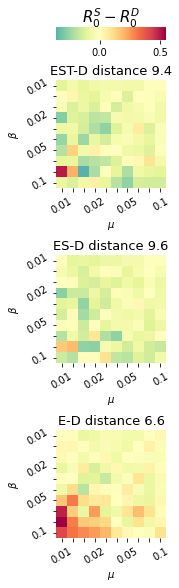

In [39]:
fig, (ax_bar,axN0,axEST,axN2,axES,axN3,axE) = plt.subplots(nrows = 7, ncols = 1,figsize=(2.55,8.28),
                                                sharey=False,
                                                gridspec_kw={'height_ratios':[0.12,0.05,1,0.3,1,0.3,1]})

plot_matrix_diff_panel_v2_cb(M_R0_DE,R0diff_min,R0diff_max,
                         '$R_0^S-R_0^D$',axE,'E-D distance %.1f'%(C_R0_DE))
plot_matrix_diff_panel_v2(M_R0_DES,R0diff_min,R0diff_max,
                          axES,'ES-D distance %.1f'%(C_R0_DES))
plot_matrix_diff_panel_v2(M_R0_DEST,R0diff_min,R0diff_max,
                          axEST,'EST-D distance %.1f'%(C_R0_DEST))
axN0.set_visible(False)
axN1.set_visible(False)
axN2.set_visible(False)
axN3.set_visible(False)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('figs/R0diff_heatmap_%s.pdf'%(dataset))
plt.show()

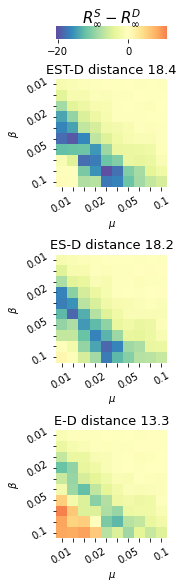

In [40]:
fig, (ax_bar,axN0,axEST,axN2,axES,axN3,axE) = plt.subplots(nrows = 7, ncols = 1,figsize=(2.55,8.28),
                                                sharey=False,
                                                gridspec_kw={'height_ratios':[0.12,0.05,1,0.3,1,0.3,1]})

plot_matrix_diff_panel_v2_cb(M_Rinf_start_DE,Rinfstart_diff_min,Rinfstart_diff_max,'$R_{\infty}^S-R_{\infty}^D$',
                         axE,'E-D distance %.1f'%(C_Rinf_start_DE))
plot_matrix_diff_panel_v2(M_Rinf_start_DES,Rinfstart_diff_min,Rinfstart_diff_max,
                         axES,'ES-D distance %.1f'%(C_Rinf_start_DES))
plot_matrix_diff_panel_v2(M_Rinf_start_DEST,Rinfstart_diff_min,Rinfstart_diff_max,
                         axEST,'EST-D distance %.1f'%(C_Rinf_start_DEST))
axN0.set_visible(False)
axN1.set_visible(False)
axN2.set_visible(False)
axN3.set_visible(False)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig('figs/Rinfstartdiff_heatmap_%s.pdf'%(dataset))
plt.show()